In [2]:
import keras
from keras import layers
import numpy as np
import random
import io


In [3]:
with io.open('chorna_rada.txt', encoding="utf-8") as f:
    text = f.read().lower()
text = text.replace("\n", " ")  # We remove newlines chars for nicer display
print("Corpus length:", len(text))

chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

x = np.zeros((len(sentences), maxlen, len(chars)), dtype="bool")
y = np.zeros((len(sentences), len(chars)), dtype="bool")
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Corpus length: 306982
Total chars: 66
Number of sequences: 102314


In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=(maxlen, len(chars))),
        layers.LSTM(128),
        layers.Dense(len(chars), activation="softmax"),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)


In [6]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


In [ ]:
epochs = 40
batch_size = 128

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print()
    print("Generating text after epoch: %d" % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print("...Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + maxlen]
        print('...Generating with seed: "' + sentence + '"')

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        print("...Generated: ", generated)
        print("-")


2023-12-14 13:00:47.612298: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 270108960 exceeds 10% of free system memory.
2023-12-14 13:00:47.712699: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 270108960 exceeds 10% of free system memory.
2023-12-14 13:00:49.323407: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-14 13:00:49.520162: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fea95e76090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-14 13:00:49.520182: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-12-14 13:00:49.548270: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1702555249.635566    6588 device_

800/800 [==============================] - 4s 3ms/step - loss: 2.3977

Generating text after epoch: 0
...Diversity: 0.2
...Generating with seed: "чора діло пішло було на лад, да й розв'я"
...Generated:  кий запородним звинав вистовав тобі так за свої з спогодував тобі в поголовав почав вистові головав тобі з почав тобі постаршив з так за тебе з своїм запородці вже тобі з нав висиму в пославай до в свії з вискав воном на воно постаршинав до так за постаршив з намав тобі в настарши понав тобравсь усякий за добравав до в свого покуже понав тобі в свії до в свії то й закаруль на звинав тобі з повород
-
...Diversity: 0.5
...Generating with seed: "чора діло пішло було на лад, да й розв'я"
...Generated:  чив головкам головові чорозького в пукавський увароваки з гобровимавсь і свії булось і вже й то з почавав тобу тебе вки й пополовати, до вского до веродським запорожцький усяки вічого його на все свого з нах добровались.  — козаки прахашть по всі булась позакирили вспочинав зачаровив так пист

2023-12-14 13:01:56.205663: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 270108960 exceeds 10% of free system memory.
2023-12-14 13:01:56.298595: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 270108960 exceeds 10% of free system memory.


800/800 [==============================] - 2s 3ms/step - loss: 2.0009

Generating text after epoch: 1
...Diversity: 0.2
...Generating with seed: "— крикне гвинтовка.  — так, що твої речі"
...Generated:   була була була була була з слухав з слава.  — од тебе за не буде до старшина поглятив то було була було було було з слухав тобі по старшина по старшина, чи своєї почі тобі по старшини.  — не добрати по старшина по старшини по старшиної до світі по старшини.  — не буде то вже вже то і слава.  — на буде то вже то раду старшини по старшині.  — каже, — так була по старшині.  — так бого по світі слуха
-
...Diversity: 0.5
...Generating with seed: "— крикне гвинтовка.  — так, що твої речі"
...Generated:   брати; да й свогомне стоять на своїть слухавсь за нам бачити, а над богогу.  — се до про свіє тобі прохадивши, одніку прогодив тобі за свогомка, і да й почити свиті були слава почі же сомко, — каже, — і се вже й не містрикнівши сторомати пробив варну й слухати по справді прувіки, потарев усі

2023-12-14 13:03:02.478500: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 270108960 exceeds 10% of free system memory.


800/800 [==============================] - 2s 3ms/step - loss: 1.8501

Generating text after epoch: 2
...Diversity: 0.2
...Generating with seed: "ояв військовий суддя з патерицею, а по л"
...Generated:  иш на ворого такого за вороговив у нас і пройдив у прийду пропивались і вони не вони не володить у прийдив у під тобі поварили за прийду повались у своїм прийдив у прийдив у прийдив у прийдив у нас не пропивались у прийду на вікно полих на прийдувались і такого в своїм на віру по вороговини, а то вони не знаєш, а не в тобі дорого на він не пославий порозаки, а той воно мовоний поварні пропивались 
-
...Diversity: 0.5
...Generating with seed: "ояв військовий суддя з патерицею, а по л"
...Generated:  иш обід тобі та за ворушний увасилась і воложик і своїм сомко, нічого да не одного по ворого тобі в свитому. нічого вже полягались у душі пропив у нас не просля усі душка пропля під прийдатись на його гринову творого хлосили, а вже не да тому за своїми він такий нашив на чорну рого запорозці 

In [17]:
from transformers import pipeline


model_pipeline = pipeline('fill-mask', model='youscan/ukr-roberta-base')
text = "Слава <mask> " 
print(model_pipeline(text))


Some weights of the model checkpoint at youscan/ukr-roberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.8824201226234436, 'token': 1146, 'token_str': ' Україні', 'sequence': 'Слава Україні '}, {'score': 0.018381725996732712, 'token': 19188, 'token_str': ' Богу', 'sequence': 'Слава Богу '}, {'score': 0.009625565260648727, 'token': 4160, 'token_str': ' країні', 'sequence': 'Слава країні '}, {'score': 0.008362971246242523, 'token': 8035, 'token_str': ' державі', 'sequence': 'Слава державі '}, {'score': 0.006171239539980888, 'token': 5, 'token_str': '!', 'sequence': 'Слава! '}]


In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import numpy as np


In [39]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
import numpy as np
import sys

class GAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("mnist_%d.png" % epoch)
        plt.close()


# Create GAN
gan = GAN()
gan.train(epochs=10000, batch_size=32, sample_interval=2000)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 53350

1/1 [==============================] - 0s 45ms/step


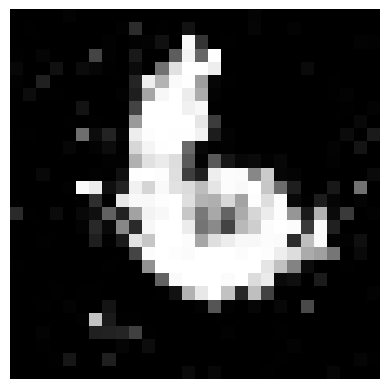

In [41]:
# Generate random noise as input for the generator
random_noise = np.random.normal(0, 1, (1, 100))

# Generate an image
generated_image = gan.generator.predict(random_noise)

# Rescale the image
generated_image = 0.5 * generated_image + 0.5

# Display the image
import matplotlib.pyplot as plt
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()
